In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Diwali Sales Data.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [5]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [7]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)

In [8]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
df_test = df.dropna()

In [10]:
data_test = [['madhav' ,11],['Gopi',15],['Keshav',  ],['Lalite',16]]
df_test = pd.DataFrame(data_test, columns = ['Name', 'Age'])
df_test

,Name,Age
0,madhav,11.0
1,Gopi,15.0
2,Keshav,NaN
3,Lalite,16.0


In [11]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [13]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


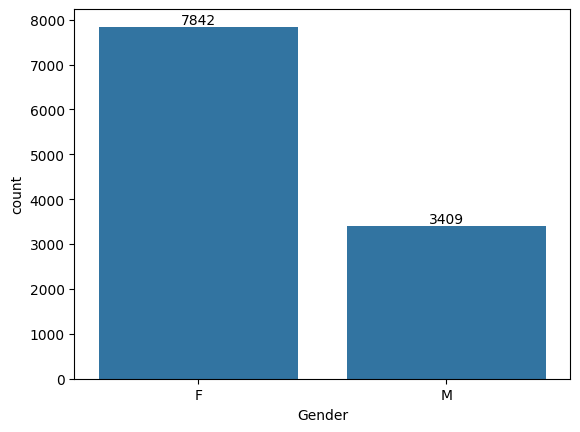

In [14]:
ax= sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
  ax.bar_label(bars)


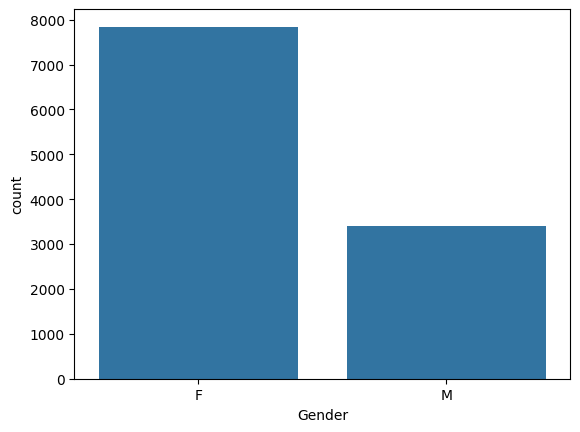

In [16]:
ax= sns.countplot(x = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='Amount'>

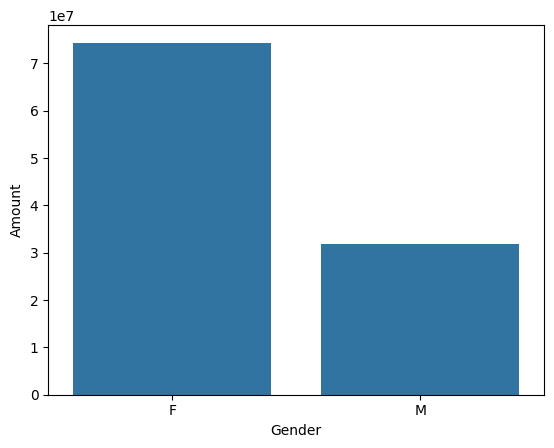

In [15]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

In [17]:
df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


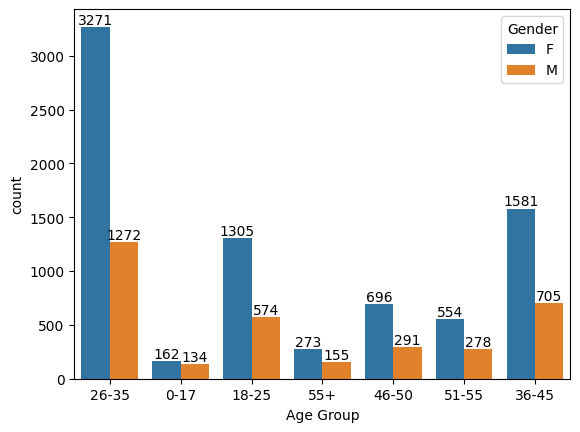

In [18]:
ax= sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bars in ax.containers:
  ax.bar_label(bars)

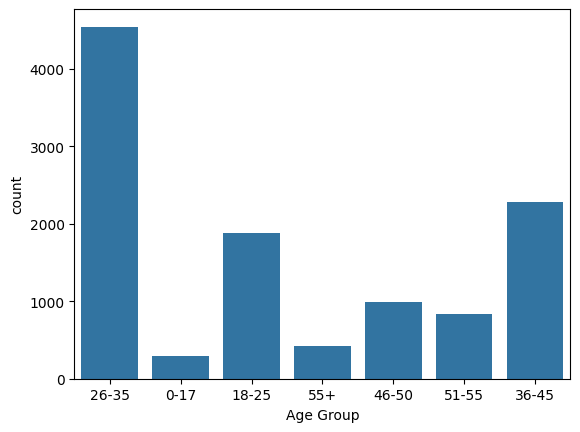

In [20]:
ax= sns.countplot(data = df, x = 'Age Group')

<Axes: xlabel='State', ylabel='Orders'>

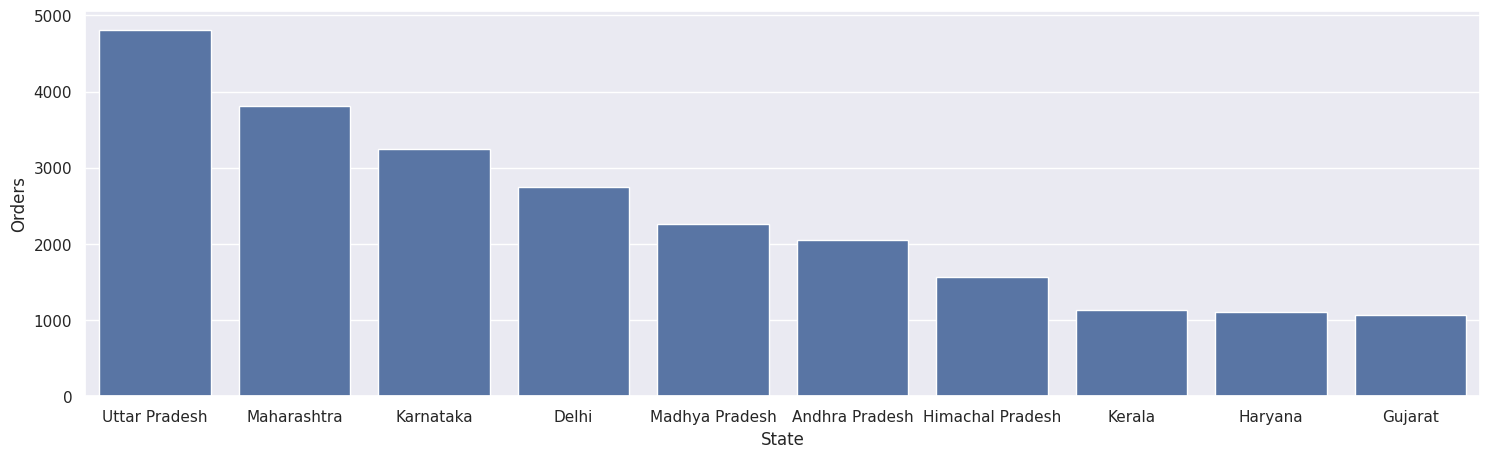

In [28]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(18,5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_state)

<Axes: xlabel='State', ylabel='Amount'>

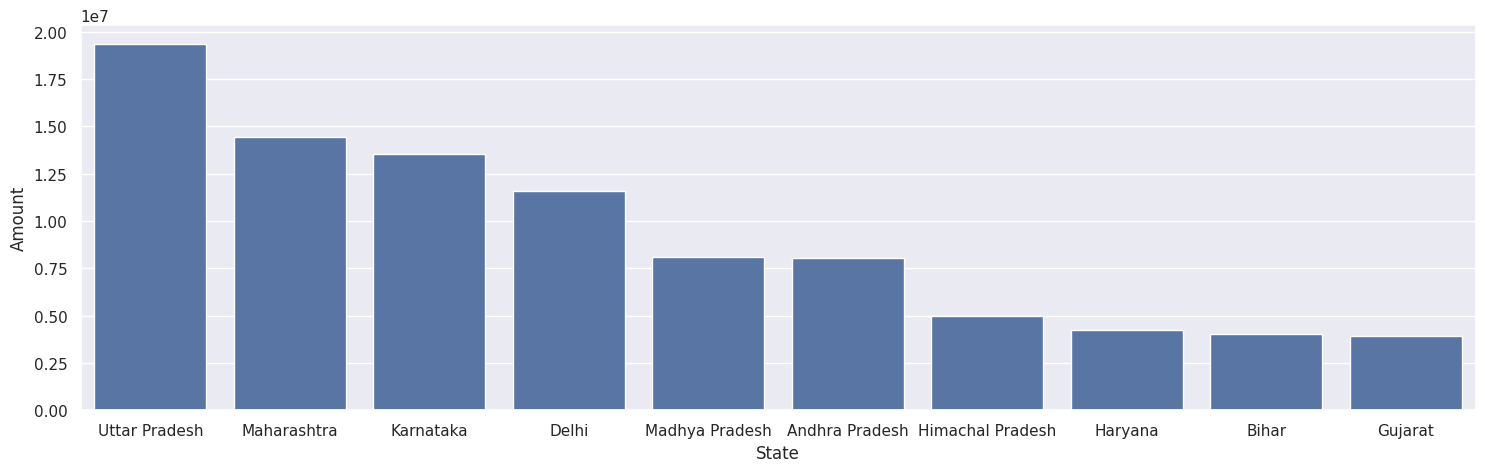

In [29]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(18,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state)

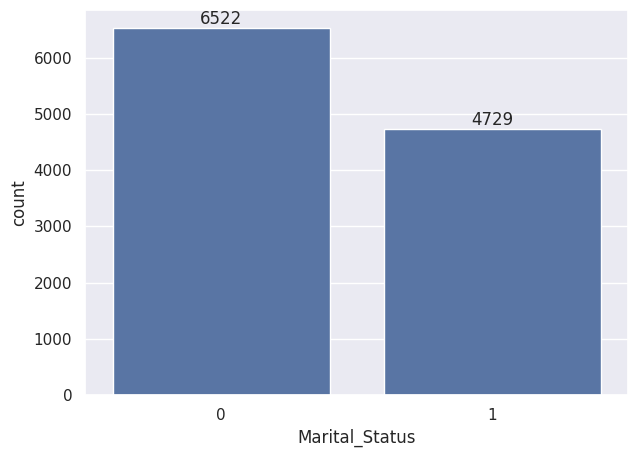

In [32]:
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc = {'figure.figsize':(7,5)})
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

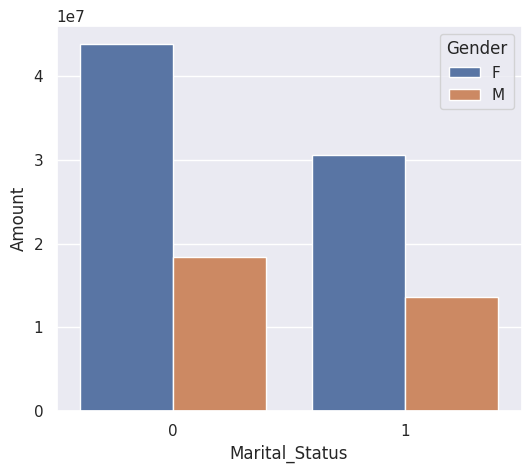

In [33]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(6,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = sales_state)

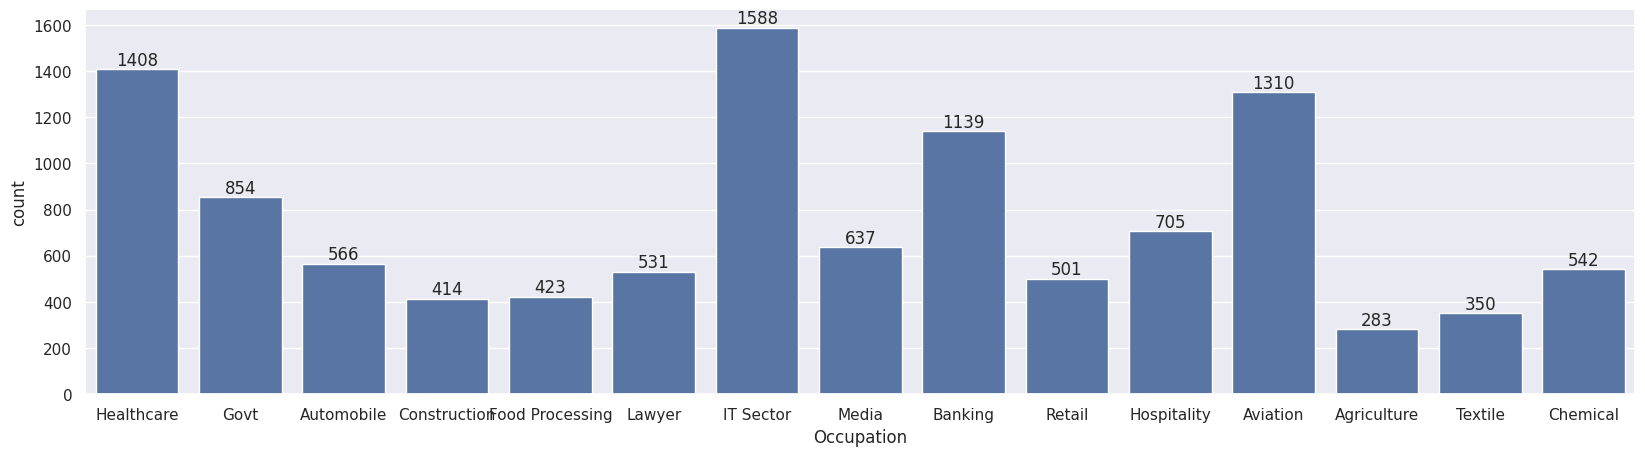

In [34]:
sns.set(rc = {'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')
for bars in ax.containers:
  ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

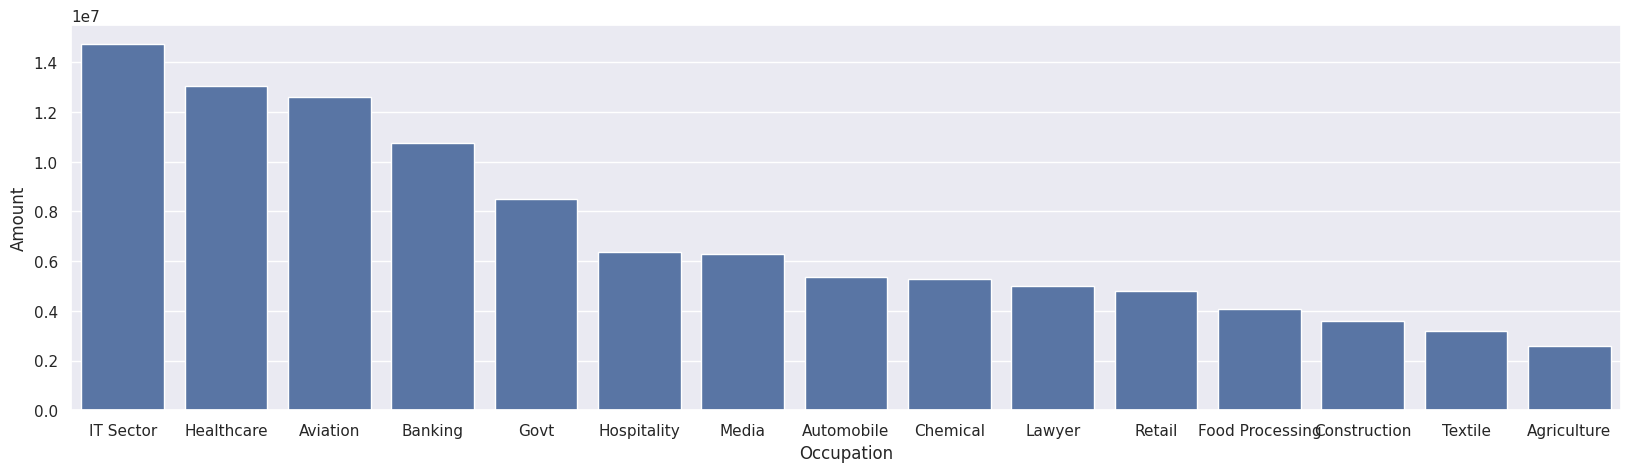

In [35]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_state)

<Axes: xlabel='Product_Category', ylabel='Amount'>

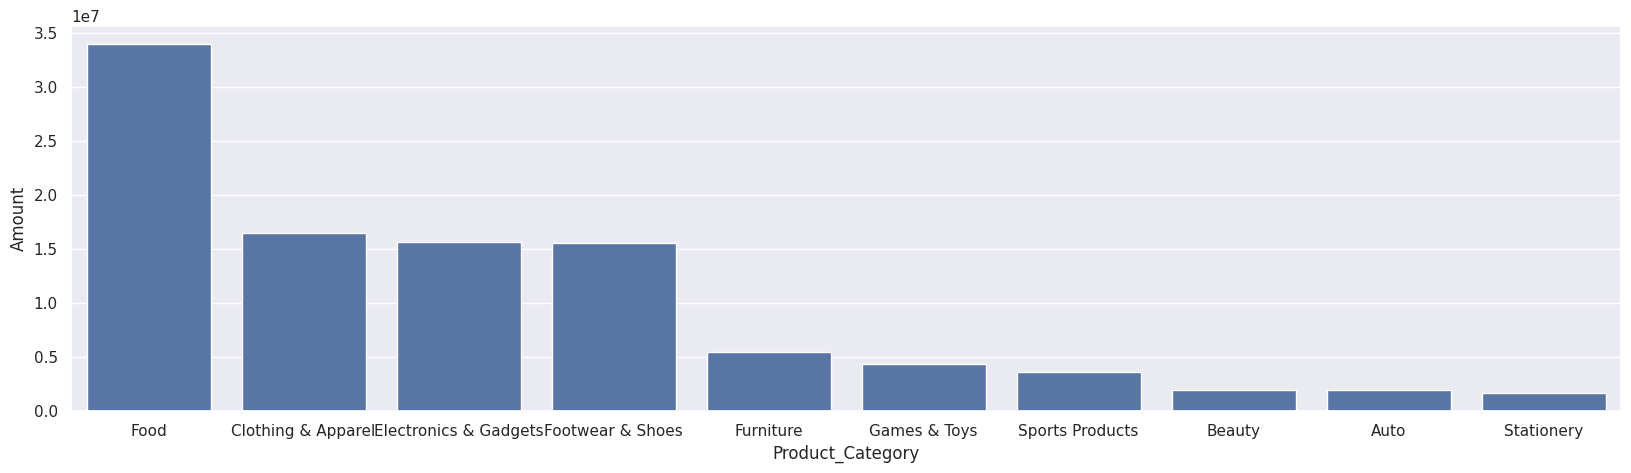

In [36]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_state)

<Axes: xlabel='Product_ID', ylabel='Orders'>

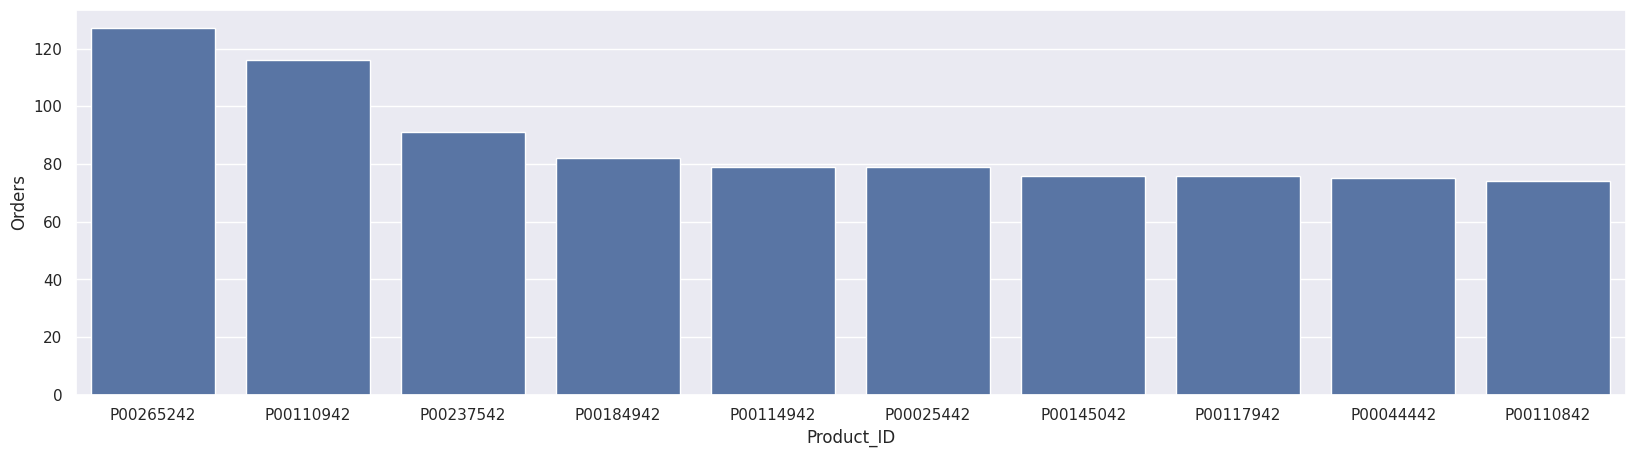

In [37]:
sales_state = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc = {'figure.figsize':(20,5)})
sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_state)

<Axes: xlabel='Product_ID'>

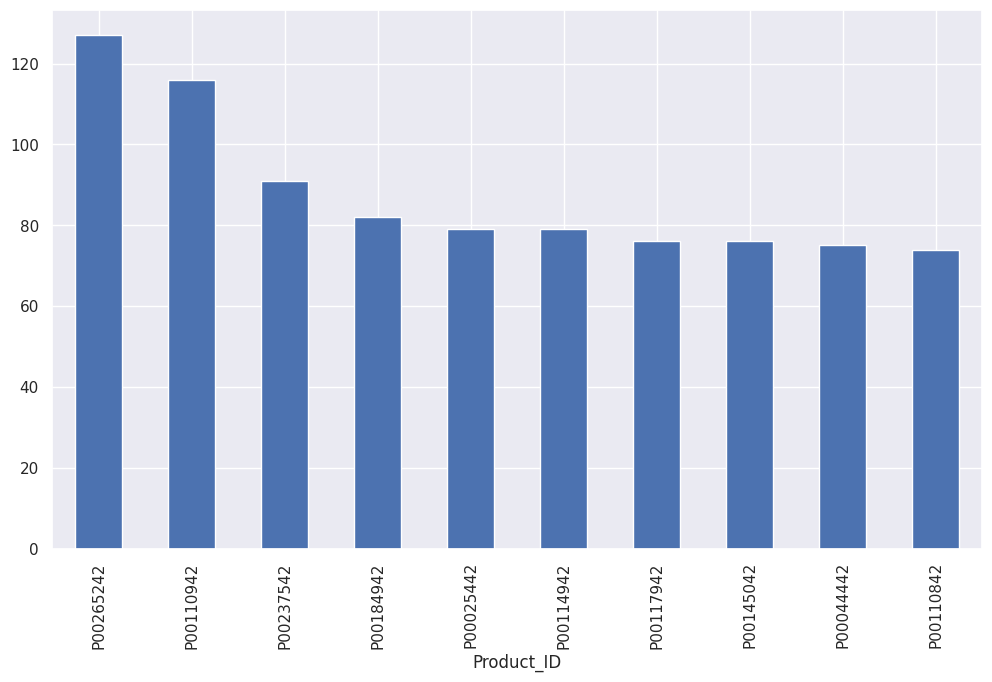

In [38]:
fig1, ax1 = plt.subplots(figsize = (12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')